In [4]:
import keras
import scipy.io as sio
import os
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import h5py
from keras.utils.np_utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import applications
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import fashion_mnist


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale


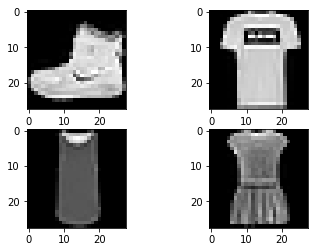

In [5]:
#visualizing data
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [8]:
img_rows, img_cols = 28, 28
x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)



In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [12]:
# convert class vectors to binary class matrices
num_classes = len(set(y_train))
print num_classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

10


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [19]:
batch_size = 128
num_classes = 10
epochs = 12
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test)
         )



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 367s 6ms/step - loss: 0.3303 - acc: 0.8829 - val_loss: 0.2964 - val_acc: 0.8908
Epoch 2/12
60000/60000 [==============================] - 389s 6ms/step - loss: 0.3057 - acc: 0.8921 - val_loss: 0.2780 - val_acc: 0.9005
Epoch 3/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.2854 - acc: 0.8984 - val_loss: 0.2717 - val_acc: 0.9005
Epoch 4/12
60000/60000 [==============================] - 351s 6ms/step - loss: 0.2724 - acc: 0.9039 - val_loss: 0.2707 - val_acc: 0.9003
Epoch 5/12
60000/60000 [==============================] - 349s 6ms/step - loss: 0.2593 - acc: 0.9069 - val_loss: 0.2553 - val_acc: 0.9092
Epoch 6/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.2469 - acc: 0.9120 - val_loss: 0.2432 - val_acc: 0.9112
Epoch 7/12
60000/60000 [==============================] - 373s 6ms/step - loss: 0.2373 - acc: 0.9162 - val_loss: 0.2436 - 

In [22]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 14s 1ms/step
('Test loss:', 0.22143763200044633)
('Test accuracy:', 0.9214)
